### Meta-Analysis on Various Studies and Variables

In this notebook, we conduct a meta-analysis on multiple studies to pool correlation coefficients for different variables. The main steps include:

1. Data extraction from the studies.
2. Data cleaning to handle missing values.
3. Meta-analysis to pool the correlation coefficients.
4. Visualization using a forest plot.

Source:
1.  Giuliani A, Milan Manani S, Crepaldi C, Domenici A, Gastaldon F, Corradi V, et al. Intraperitoneal Pressure in Polycystic and Non-Polycystic Kidney Disease Patients, Treated by Peritoneal Dialysis. Blood Purification. 2020;49(6): 670–676. https://doi.org/10.1159/000506177.
2.  Castellanos LB, Clemente EP, Cabañas CB, Parra DM, Contador MB, Morera JCO, et al. Clinical Relevance of Intraperitoneal Pressure in Peritoneal Dialysis Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2017;37(5): 562–567. https://doi.org/10.3747/pdi.2016.00267.
3.  De Jesús Ventura M, Amato D, Correa–Rotter R, Paniagua R, Mexican Nephrology Collaborative Study Group. Relationship between Fill Volume, Intraperitoneal Pressure, Body Size, and Subjective Discomfort Perception in CAPD Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2000;20(2): 188–193. https://doi.org/10.1177/089686080002000205.
4.  Lauro V, Luccio F, Colaluca M, Francesco F, Pintauro A. Intraperitoneal hydrostatic pressure and volume in peritoneal dialysis patients. EDTNA-ERCA Journal. 1999;25(2): 16–17. https://doi.org/10.1111/j.1755-6686.1999.tb00023.x.
5.  Fischbach M, Terzic J, Provot E, Weiss L, Bergere V, Menouer S, et al. Intraperitoneal pressure in children: fill-volume related and impacted by body mass index. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2003;23(4): 391–394. 
6.  Scanziani R. Intraperitoneal hydrostatic pressure and flow characteristics of peritoneal catheters in automated peritoneal dialysis. Nephrology Dialysis Transplantation. 2003;18(11): 2391–2398. https://doi.org/10.1093/ndt/gfg353.
7.  Dejardin A, Robert A, Goffin E. Intraperitoneal pressure in PD patients: relationship to intraperitoneal volume, body size and PD-related complications. Nephrology Dialysis Transplantation. 2007;22(5): 1437–1444. https://doi.org/10.1093/ndt/gfl745.
8.  Outerelo MC, Gouveia R, Teixeira e Costa F, Ramos A. Intraperitoneal pressure has a prognostic impact on peritoneal dialysis patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2014;34(6): 652–654. https://doi.org/10.3747/pdi.2012.00192.
9.  Sigogne M, Kanagaratnam L, Mora C, Pierre M, Petrache A, Marcus C, et al. Identification of the Factors Associated With Intraperitoneal Pressure in ADPKD Patients Treated With Peritoneal Dialysis. Kidney International Reports. 2020;5(7): 1007–1013. https://doi.org/10.1016/j.ekir.2020.04.012.
10.  Rusthoven E, van der Vlugt ME, van Lingen-van Bueren LJ, van Schaijk TCJG, Willems HL, Monnens LAH, et al. Evaluation of intraperitoneal pressure and the effect of different osmotic agents on intraperitoneal pressure in children. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2005;25(4): 352–356. 
11.  Betancourt L, Pico S, Rojas E, Gordo MJ, Oliva JC, Almirall J, et al. Relationship between intraperitoneal pressure and the development of hernias in peritoneal dialysis: confirmation for the first time of a widely accepted concept. International Urology and Nephrology. 2023; https://doi.org/10.1007/s11255-023-03663-5.
12.  Aranda RA, Romão Jr. JE, Kakehashi E, Domingos W, Sabbaga E, Marcondes M, et al. Intraperitoneal pressure and hernias in children on peritoneal dialysis. Pediatric Nephrology. 2000;14(1): 0022–0024. https://doi.org/10.1007/s004670050005.


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data extraction

data = {
    'study_id': ['Giuliani2020', 'Castellanos2017', 'Ventura2000', 'Lauro1999', 'Fishbach2003',
                 'Scanziani2003', 'Dejardin2007', 'Outerelo2014', 'Sigogne2020', 'Rusthoven2005',
                 'Betancourt2023', 'Aranda2000'],

    'n': [77, 49, 81, 30, 17, 34, 61, 54, 60, 30, 124, 24],
    'r_bmi': [0.42, 0.69, np.nan, np.nan, 0.82, 0.53, 0.28, 0.346, 0.251, np.nan, 0.569, np.nan],
    'r_bsa': [0.2, 0.45, np.nan, np.nan, 0.34, np.nan, 0.11, 0.05, 0.148, np.nan, np.nan, np.nan],
    'r_ipv': [-0.13, np.nan, np.nan, np.nan, np.nan, np.nan, 0.96, np.nan, 0.107, np.nan, 0.113, np.nan],
    'r_ipv_bsa': [-0.25, np.nan, -0.319, 0.355, 0.36, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'r_age':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.1, 0.141, 0.009, np.nan, 0.29, np.nan,],
    'r_cci':[np.nan, 0.387, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.344, np.nan,]
}


### Data Cleaning

Before performing the meta-analysis, it's essential to filter out missing data and extract valid data for each variable. The following functions facilitate this process.

In [2]:

# Separate valid data

def extract_valid_data(data, r_key):
    valid_data = {'study_id': [], 'n': [], 'r': []}
    for i, r in enumerate(data[r_key]):
        if not np.isnan(r):
            valid_data['study_id'].append(data['study_id'][i])
            valid_data['n'].append(data['n'][i])
            valid_data['r'].append(r)
    return valid_data


### Meta-Analysis

With the valid data in hand, we can now perform the meta-analysis. The purpose is to pool the correlation coefficients across different studies to get a combined estimate using DerSimonian and Laird random effects model. We will calculate statistics like the \( I^2 \) statistic to check the heterogeneity among studies.


In [3]:

def perform_meta_analysis(valid_data):
    valid_data['z'] = 0.5 * np.log((1 + np.array(valid_data['r'])) / (1 - np.array(valid_data['r'])))
    valid_data['var_z'] = 1 / (np.array(valid_data['n']) - 3)
    w = 1 / np.array(valid_data['var_z'])
    z_bar = np.sum(w * valid_data['z']) / np.sum(w)
    k = len(valid_data['z'])  
    Q = np.sum(w * (valid_data['z'] - z_bar)**2)
    # Calculating p-value for Q
    p_value_Q = 1 - stats.chi2.cdf(Q, k-1)

    if Q == k - 1:
        I2 = 0
    else:
        I2 = max(0, ((Q - (k - 1)) / Q) * 100)

    denominator = (np.sum(w) - (np.sum(w**2) / np.sum(w)))
    tau2 = 0 if denominator == 0 else (Q - (k - 1)) / denominator
    tau2 = max(0, tau2)  # Ensure non-negativity
    w_RE = 1 / (np.array(valid_data['var_z']) + tau2)
    w_RE_sum = np.sum(w_RE)
    if w_RE_sum == 0:
        z_bar_RE = 0
        weights_percent = [0] * k
    else:
        z_bar_RE = np.sum(w_RE * valid_data['z']) / w_RE_sum
        weights_percent = (w_RE / w_RE_sum) * 100

    se_z_bar_RE = np.sqrt(1 / np.sum(w_RE)) if w_RE_sum != 0 else 0
    ci_z_bar_RE = (z_bar_RE - 1.96*se_z_bar_RE, z_bar_RE + 1.96*se_z_bar_RE)

    # Back Transformation to r Scale
    r_bar_RE = (np.exp(2 * z_bar_RE) - 1) / (np.exp(2 * z_bar_RE) + 1)
    ci_r_bar_RE = ((np.exp(2 * ci_z_bar_RE[0]) - 1) / (np.exp(2 * ci_z_bar_RE[0]) + 1),
                   (np.exp(2 * ci_z_bar_RE[1]) - 1) / (np.exp(2 * ci_z_bar_RE[1]) + 1))

    return r_bar_RE, ci_r_bar_RE, valid_data, weights_percent, I2, Q, p_value_Q


### Performing Meta-Analysis for Each Variable

We will now use the above functions to extract valid data and then perform a meta-analysis on each variable of interest.

In [4]:

# Extracting valid data and performing meta-analyses
valid_data_bmi = extract_valid_data(data, 'r_bmi')
r_bar_RE_bmi, ci_r_bar_RE_bmi, valid_data_bmi, weights_percent_bmi, I2_bmi, Q_bmi, p_value_Q_bmi  = perform_meta_analysis(valid_data_bmi)
valid_data_bsa = extract_valid_data(data, 'r_bsa')
r_bar_RE_bsa, ci_r_bar_RE_bsa, valid_data_bsa, weights_percent_bsa, I2_bsa, Q_bsa, p_value_Q_bsa = perform_meta_analysis(valid_data_bsa)
valid_data_ipv = extract_valid_data(data, 'r_ipv')
r_bar_RE_ipv, ci_r_bar_RE_ipv, valid_data_ipv, weights_percent_ipv, I2_ipv, Q_ipv, p_value_Q_ipv = perform_meta_analysis(valid_data_ipv)
valid_data_ipv_bsa = extract_valid_data(data, 'r_ipv_bsa')
r_bar_RE_ipv_bsa, ci_r_bar_RE_ipv_bsa, valid_data_ipv_bsa, weights_percent_ipv_bsa, I2_ipv_bsa, Q_ipv_bsa, p_value_Q_ipv_bsa = perform_meta_analysis(valid_data_ipv_bsa)
valid_data_age = extract_valid_data(data, 'r_age')
r_bar_RE_age, ci_r_bar_RE_age, valid_data_age, weights_percent_age, I2_age, Q_age, p_value_Q_age = perform_meta_analysis(valid_data_age)
valid_data_cci = extract_valid_data(data, 'r_cci')
r_bar_RE_cci, ci_r_bar_RE_cci, valid_data_cci, weights_percent_cci, I2_cci, Q_cci, p_value_Q_cci = perform_meta_analysis(valid_data_cci)


### Results

Here are the pooled correlation coefficients and their 95% confidence intervals for each variable.


In [5]:

# Results: Pooled correlation and 95% CI for BMI, BSA, IPV, IPV/BSA, Age
display((r_bar_RE_bmi, ci_r_bar_RE_bmi), 
        (r_bar_RE_bsa, ci_r_bar_RE_bsa), 
        (r_bar_RE_ipv, ci_r_bar_RE_ipv), 
        (r_bar_RE_ipv_bsa, ci_r_bar_RE_ipv_bsa), 
        (r_bar_RE_age, ci_r_bar_RE_age),
        (r_bar_RE_cci, ci_r_bar_RE_cci))


(0.48863877005004724, (0.34979637497754906, 0.6064768490373297))

(0.1983498907111068, (0.07744764691867956, 0.31350298707548263))

(0.4677215312937726, (-0.3435117847128395, 0.8792308382893501))

(-0.012613028214413239, (-0.33805111505237523, 0.3155192959736773))

(0.16202130099182538, (0.030888349369065763, 0.2876711200409068))

(0.3559991212192356, (0.2171160736938831, 0.48075534542974774))

### Data Extraction for Plotting

To visually represent the results, we'll use a forest plot. First, we'll extract the necessary data for plotting.


In [6]:
# Extracting data for the plot
def extract_plot_data(valid_data):
    z_values = valid_data['z']
    z_se = np.sqrt(valid_data['var_z'])
    r_values = (np.exp(2 * np.array(z_values)) - 1) / (np.exp(2 * np.array(z_values)) + 1)
    ci_lower = (np.exp(2 * (z_values - 1.96 * z_se)) - 1) / (np.exp(2 * (z_values - 1.96 * z_se)) + 1)
    ci_upper = (np.exp(2 * (z_values + 1.96 * z_se)) - 1) / (np.exp(2 * (z_values + 1.96 * z_se)) + 1)
    return r_values, ci_lower, ci_upper

# Extracting plot data
r_values_bmi, ci_lower_bmi, ci_upper_bmi= extract_plot_data(valid_data_bmi)
r_values_bsa, ci_lower_bsa, ci_upper_bsa = extract_plot_data(valid_data_bsa)
r_values_ipv, ci_lower_ipv, ci_upper_ipv = extract_plot_data(valid_data_ipv)
r_values_ipv_bsa, ci_lower_ipv_bsa, ci_upper_ipv_bsa = extract_plot_data(valid_data_ipv_bsa)
r_values_age, ci_lower_age, ci_upper_age = extract_plot_data(valid_data_age)
r_values_cci, ci_lower_cci, ci_upper_cci = extract_plot_data(valid_data_cci)

### Forest Plot Visualization

A forest plot provides a visual representation of the individual study estimates along with the pooled estimate. This allows for an easy comparison and understanding of the distribution of estimates.


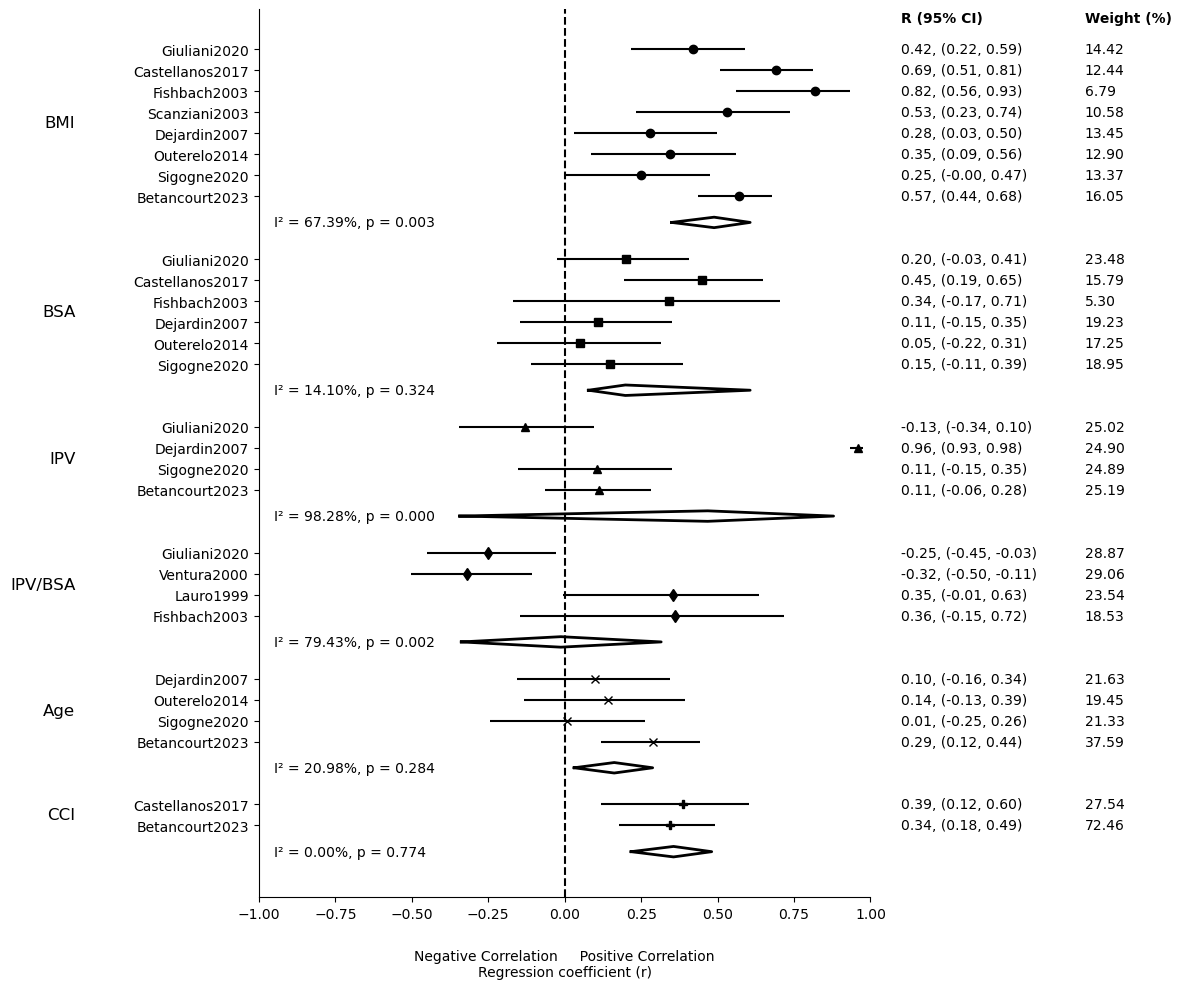

In [9]:

# Creating a combined forest plot with 2-row x-label
fig, ax = plt.subplots(figsize=(16, 10))

# Removing the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plotting IPP-BMI data
ax.errorbar(r_values_bmi, np.arange(len(valid_data_bmi['study_id'])), xerr=[r_values_bmi - ci_lower_bmi, ci_upper_bmi - r_values_bmi], fmt='o', label='IPP-BMI Estimate', color='black')
x_bmi = [ci_r_bar_RE_bmi[0], 
         r_bar_RE_bmi, 
         ci_r_bar_RE_bmi[1], 
         r_bar_RE_bmi, 
         ci_r_bar_RE_bmi[0]]
y_bmi = [len(valid_data_bmi['study_id']) + 0.25, 
         len(valid_data_bmi['study_id']), 
         len(valid_data_bmi['study_id']) + 0.25, 
         len(valid_data_bmi['study_id']) + 0.5, 
         len(valid_data_bmi['study_id']) + 0.25]
ax.plot(x_bmi, y_bmi, 'k-', linewidth=2, label='95% CI of IPP-BMI Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_bmi, 
                                                     r_values_bmi, 
                                                     ci_lower_bmi, 
                                                     ci_upper_bmi)):
    ax.text(1.1, i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, i, f"{weight:.2f}", va='center')
ax.text(-0.95, len(valid_data_bmi['study_id']) + 0.25, f"I² = {I2_bmi:.2f}%, p = {p_value_Q_bmi:.3f}", va='center', ha='left', fontsize=10)

# # Plotting IPP-BSA data
offset_bsa = len(valid_data_bmi['study_id']) + 2
ax.errorbar(r_values_bsa, np.arange(len(valid_data_bsa['study_id'])) + offset_bsa, xerr=[r_values_bsa - ci_lower_bsa, ci_upper_bsa - r_values_bsa], fmt='s', label='IPP-BSA Estimate', color='black')
x_bsa = [ci_r_bar_RE_bsa[0], 
         r_bar_RE_bsa, 
         ci_r_bar_RE_bmi[1], 
         r_bar_RE_bsa, 
         ci_r_bar_RE_bsa[0]]
y_bsa = [offset_bsa + len(valid_data_bsa['study_id']) + 0.25, 
         offset_bsa + len(valid_data_bsa['study_id']), 
         offset_bsa + len(valid_data_bsa['study_id']) + 0.25, 
         offset_bsa + len(valid_data_bsa['study_id']) + 0.5, 
         offset_bsa + len(valid_data_bsa['study_id']) + 0.25]
ax.plot(x_bsa, y_bsa, 'k-', linewidth=2, label='95% CI of IPP-BSA Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_bsa, 
                                                     r_values_bsa, 
                                                     ci_lower_bsa, 
                                                     ci_upper_bsa)):
    ax.text(1.1, offset_bsa + i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, offset_bsa + i, f"{weight:.2f}", va='center')
ax.text(-0.95, offset_bsa + len(valid_data_bsa['study_id']) + 0.25, f"I² = {I2_bsa:.2f}%, p = {p_value_Q_bsa:.3f}", va='center', ha='left', fontsize=10)

# Plotting IPP-IPV data
offset_ipv = offset_bsa + len(valid_data_bsa['study_id']) + 2
ax.errorbar(r_values_ipv, np.arange(len(valid_data_ipv['study_id'])) + offset_ipv, xerr=[r_values_ipv - ci_lower_ipv, ci_upper_ipv - r_values_ipv], fmt='^', label='IPP-IPV Estimate', color='black')
x_ipv = [ci_r_bar_RE_ipv[0], 
         r_bar_RE_ipv, 
         ci_r_bar_RE_ipv[1], 
         r_bar_RE_ipv, 
         ci_r_bar_RE_ipv[0]]
y_ipv = [offset_ipv + len(valid_data_ipv['study_id']) + 0.25, 
         offset_ipv + len(valid_data_ipv['study_id']), 
         offset_ipv + len(valid_data_ipv['study_id']) + 0.25, 
         offset_ipv + len(valid_data_ipv['study_id']) + 0.5, 
         offset_ipv + len(valid_data_ipv['study_id']) + 0.25]
ax.plot(x_ipv, y_ipv, 'k-', linewidth=2, label='95% CI of IPP-IPV Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_ipv, 
                                                     r_values_ipv, 
                                                     ci_lower_ipv, 
                                                     ci_upper_ipv)):
    ax.text(1.1, offset_ipv + i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, offset_ipv + i, f"{weight:.2f}", va='center')
ax.text(-0.95, offset_ipv + len(valid_data_ipv['study_id']) + 0.25, f"I² = {I2_ipv:.2f}%, p = {p_value_Q_ipv:.3f}", va='center', ha='left', fontsize=10)

# Plotting IPV/BSA data
offset_ipv_bsa = offset_ipv + len(valid_data_ipv['study_id']) + 2
ax.errorbar(r_values_ipv_bsa, np.arange(len(valid_data_ipv_bsa['study_id'])) + offset_ipv_bsa, xerr=[r_values_ipv_bsa - ci_lower_ipv_bsa, ci_upper_ipv_bsa - r_values_ipv_bsa], fmt='d', label='IPV/BSA Estimate', color='black')
x_ipv_bsa = [ci_r_bar_RE_ipv_bsa[0], 
         r_bar_RE_ipv_bsa, 
         ci_r_bar_RE_ipv_bsa[1], 
         r_bar_RE_ipv_bsa, 
         ci_r_bar_RE_ipv_bsa[0]]
y_ipv_bsa = [offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 0.25, 
         offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']), 
         offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 0.25, 
         offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 0.5, 
         offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 0.25]
ax.plot(x_ipv_bsa, y_ipv_bsa, 'k-', linewidth=2, label='95% CI of IPV/BSA Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_ipv_bsa, 
                                                     r_values_ipv_bsa, 
                                                     ci_lower_ipv_bsa, 
                                                     ci_upper_ipv_bsa)):
    ax.text(1.1, offset_ipv_bsa + i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, offset_ipv_bsa + i, f"{weight:.2f}", va='center')
ax.text(-0.95, offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 0.25, f"I² = {I2_ipv_bsa:.2f}%, p = {p_value_Q_ipv_bsa:.3f}", va='center', ha='left', fontsize=10)

# Plotting Age data
offset_age = offset_ipv_bsa + len(valid_data_ipv_bsa['study_id']) + 2
ax.errorbar(r_values_age, np.arange(len(valid_data_age['study_id'])) + offset_age, xerr=[r_values_age - ci_lower_age, ci_upper_age - r_values_age], fmt='x', label='Age Estimate', color='black')
x_age = [ci_r_bar_RE_age[0], 
         r_bar_RE_age, 
         ci_r_bar_RE_age[1], 
         r_bar_RE_age, 
         ci_r_bar_RE_age[0]]
y_age = [offset_age + len(valid_data_age['study_id']) + 0.25, 
         offset_age + len(valid_data_age['study_id']), 
         offset_age + len(valid_data_age['study_id']) + 0.25, 
         offset_age + len(valid_data_age['study_id']) + 0.5, 
         offset_age + len(valid_data_age['study_id']) + 0.25]
ax.plot(x_age, y_age, 'k-', linewidth=2, label='95% CI of Age Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_age, 
                                                     r_values_age, 
                                                     ci_lower_age, 
                                                     ci_upper_age)):
    ax.text(1.1, offset_age + i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, offset_age + i, f"{weight:.2f}", va='center')
ax.text(-0.95, offset_age + len(valid_data_age['study_id']) + 0.25, f"I² = {I2_age:.2f}%, p = {p_value_Q_age:.3f}", va='center', ha='left', fontsize=10)

# Plotting CCI data
offset_cci = offset_age + len(valid_data_age['study_id']) + 2
ax.errorbar(r_values_cci, np.arange(len(valid_data_cci['study_id'])) + offset_cci, xerr=[r_values_cci - ci_lower_cci, ci_upper_cci - r_values_cci], fmt='P', label='CCI Estimate', color='black')
x_cci = [ci_r_bar_RE_cci[0], 
         r_bar_RE_cci, 
         ci_r_bar_RE_cci[1], 
         r_bar_RE_cci, 
         ci_r_bar_RE_cci[0]]
y_cci = [offset_cci + len(valid_data_cci['study_id']) + 0.25, 
         offset_cci + len(valid_data_cci['study_id']), 
         offset_cci + len(valid_data_cci['study_id']) + 0.25, 
         offset_cci + len(valid_data_cci['study_id']) + 0.5, 
         offset_cci + len(valid_data_cci['study_id']) + 0.25]
ax.plot(x_cci, y_cci, 'k-', linewidth=2, label='95% CI of CCI Pooled Estimate')
# Adding text (weights) to the right
for i, (weight, r, ci_low, ci_high) in enumerate(zip(weights_percent_cci, 
                                                     r_values_cci, 
                                                     ci_lower_cci, 
                                                     ci_upper_cci)):
    ax.text(1.1, offset_cci + i, f"{r:.2f}, ({ci_low:.2f}, {ci_high:.2f})", va='center')
    ax.text(1.7, offset_cci + i, f"{weight:.2f}", va='center')
ax.text(-0.95, offset_cci + len(valid_data_cci['study_id']) + 0.25, f"I² = {I2_cci:.2f}%, p = {p_value_Q_cci:.3f}", va='center', ha='left', fontsize=10)

# Annotations and labels
all_study_ids = valid_data_bmi['study_id'] + valid_data_bsa['study_id'] + valid_data_ipv['study_id'] + valid_data_ipv_bsa['study_id'] + valid_data_cci['study_id']
ax.set_yticks(list(np.arange(len(valid_data_bmi['study_id']))) + 
              list(np.arange(len(valid_data_bsa['study_id'])) + offset_bsa) + 
              list(np.arange(len(valid_data_ipv['study_id'])) + offset_ipv) +
              list(np.arange(len(valid_data_ipv_bsa['study_id'])) + offset_ipv_bsa) +
              list(np.arange(len(valid_data_age['study_id'])) + offset_age) +
              list(np.arange(len(valid_data_cci['study_id'])) + offset_cci))
ax.text(-1.6, np.mean(np.arange(len(valid_data_bmi['study_id']))), 'BMI', fontsize=12, va='center', ha='right')
ax.text(-1.6, np.mean(np.arange(len(valid_data_bsa['study_id'])) + offset_bsa), 'BSA', fontsize=12, va='center', ha='right')
ax.text(-1.6, np.mean(np.arange(len(valid_data_ipv['study_id'])) + offset_ipv), 'IPV', fontsize=12, va='center', ha='right')
ax.text(-1.6, np.mean(np.arange(len(valid_data_ipv_bsa['study_id'])) + offset_ipv_bsa), 'IPV/BSA', fontsize=12, va='center', ha='right')
ax.text(-1.6, np.mean(np.arange(len(valid_data_age['study_id'])) + offset_age), 'Age', fontsize=12, va='center', ha='right')
ax.text(-1.6, np.mean(np.arange(len(valid_data_cci['study_id'])) + offset_cci), 'CCI', fontsize=12, va='center', ha='right')
ax.text(1.1, -1.5, "R (95% CI)", va='center', ha='left', fontsize=10, fontweight='bold')
ax.text(1.7, -1.5, "Weight (%)", va='center', ha='left', fontsize=10, fontweight='bold')
ax.set_yticklabels(valid_data_bmi['study_id'] + valid_data_bsa['study_id'] + valid_data_ipv['study_id'] + valid_data_ipv_bsa['study_id'] + valid_data_age['study_id'] + valid_data_cci['study_id'])
ax.set_xlabel('Negative Correlation     Positive Correlation\nRegression coefficient (r)', labelpad=20)
ax.set_xlim([-1, 1])  # Setting x-axis limits to make it symmetrical

# Additional annotations and modifications
plt.axvline(x=0, color='black', linestyle='--')  # Add a vertical line at r = 0

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the first study on top
plt.tight_layout()
plt.savefig('/mnt/d/pydatascience/pd-related trail/eipp_sr/Figure_2_1000dpi.png', dpi=1000)
plt.show()